# Optimization via Gradient Descent

## Bonus part: Gradient descent simple example

#### GD implementation

In [34]:
import numpy as np
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import warnings

warnings.filterwarnings('ignore') 

In [2]:
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
    # generate an initial point
    solution = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # run the gradient descent
    for i in range(n_iter):
        # calculate gradient
        gradient = derivative(solution)
        # take a step
        solution = solution - step_size * gradient
        # evaluate candidate point
        solution_eval = objective(solution)
        # report progress
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solution, solution_eval]

#### GD usecase

Let's illustrate on a simple example - parabolic function

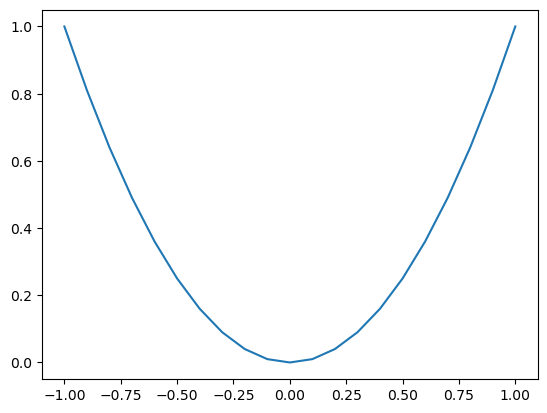

In [3]:
# plot of simple function
from numpy import arange
from matplotlib import pyplot

# objective function
def objective(x):
    return x**2.0

# define range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
inputs = arange(r_min, r_max+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# show the plot
pyplot.show()

In [10]:
# derivative of objective function
def derivative(x):
    return x * 2.0


# define range for input
bounds = np.array([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the maximum step size
step_size = 0.1
# perform the gradient descent search
best, score = gradient_descent(objective, derivative, bounds, n_iter, step_size)

>0 f([0.60365553]) = 0.36440
>1 f([0.48292442]) = 0.23322
>2 f([0.38633954]) = 0.14926
>3 f([0.30907163]) = 0.09553
>4 f([0.2472573]) = 0.06114
>5 f([0.19780584]) = 0.03913
>6 f([0.15824467]) = 0.02504
>7 f([0.12659574]) = 0.01603
>8 f([0.10127659]) = 0.01026
>9 f([0.08102127]) = 0.00656
>10 f([0.06481702]) = 0.00420
>11 f([0.05185361]) = 0.00269
>12 f([0.04148289]) = 0.00172
>13 f([0.03318631]) = 0.00110
>14 f([0.02654905]) = 0.00070
>15 f([0.02123924]) = 0.00045
>16 f([0.01699139]) = 0.00029
>17 f([0.01359311]) = 0.00018
>18 f([0.01087449]) = 0.00012
>19 f([0.00869959]) = 0.00008
>20 f([0.00695967]) = 0.00005
>21 f([0.00556774]) = 0.00003
>22 f([0.00445419]) = 0.00002
>23 f([0.00356335]) = 0.00001
>24 f([0.00285068]) = 0.00001
>25 f([0.00228055]) = 0.00001
>26 f([0.00182444]) = 0.00000
>27 f([0.00145955]) = 0.00000
>28 f([0.00116764]) = 0.00000
>29 f([0.00093411]) = 0.00000


Теперь поменяем step_size на 1 <br>
Или на любой другой, например, очень маленький $(1e-5)$

In [9]:
step_size = 1e-5
best, score = gradient_descent(objective, derivative, bounds, n_iter, step_size)

>0 f([0.41826013]) = 0.17494
>1 f([0.41825177]) = 0.17493
>2 f([0.4182434]) = 0.17493
>3 f([0.41823504]) = 0.17492
>4 f([0.41822667]) = 0.17491
>5 f([0.41821831]) = 0.17491
>6 f([0.41820994]) = 0.17490
>7 f([0.41820158]) = 0.17489
>8 f([0.41819321]) = 0.17489
>9 f([0.41818485]) = 0.17488
>10 f([0.41817649]) = 0.17487
>11 f([0.41816812]) = 0.17486
>12 f([0.41815976]) = 0.17486
>13 f([0.4181514]) = 0.17485
>14 f([0.41814303]) = 0.17484
>15 f([0.41813467]) = 0.17484
>16 f([0.41812631]) = 0.17483
>17 f([0.41811795]) = 0.17482
>18 f([0.41810958]) = 0.17482
>19 f([0.41810122]) = 0.17481
>20 f([0.41809286]) = 0.17480
>21 f([0.4180845]) = 0.17479
>22 f([0.41807614]) = 0.17479
>23 f([0.41806777]) = 0.17478
>24 f([0.41805941]) = 0.17477
>25 f([0.41805105]) = 0.17477
>26 f([0.41804269]) = 0.17476
>27 f([0.41803433]) = 0.17475
>28 f([0.41802597]) = 0.17475
>29 f([0.41801761]) = 0.17474


#### Visualization

##### Might not converge sometimes

>0 f([0.45247159]) = 0.20473
>1 f([0.36197727]) = 0.13103
>2 f([0.28958182]) = 0.08386
>3 f([0.23166546]) = 0.05367
>4 f([0.18533236]) = 0.03435
>5 f([0.14826589]) = 0.02198
>6 f([0.11861271]) = 0.01407
>7 f([0.09489017]) = 0.00900
>8 f([0.07591214]) = 0.00576
>9 f([0.06072971]) = 0.00369
>10 f([0.04858377]) = 0.00236
>11 f([0.03886701]) = 0.00151
>12 f([0.03109361]) = 0.00097
>13 f([0.02487489]) = 0.00062
>14 f([0.01989991]) = 0.00040
>15 f([0.01591993]) = 0.00025
>16 f([0.01273594]) = 0.00016
>17 f([0.01018875]) = 0.00010
>18 f([0.008151]) = 0.00007
>19 f([0.0065208]) = 0.00004
>20 f([0.00521664]) = 0.00003
>21 f([0.00417331]) = 0.00002
>22 f([0.00333865]) = 0.00001
>23 f([0.00267092]) = 0.00001
>24 f([0.00213674]) = 0.00000
>25 f([0.00170939]) = 0.00000
>26 f([0.00136751]) = 0.00000
>27 f([0.00109401]) = 0.00000
>28 f([0.00087521]) = 0.00000
>29 f([0.00070017]) = 0.00000


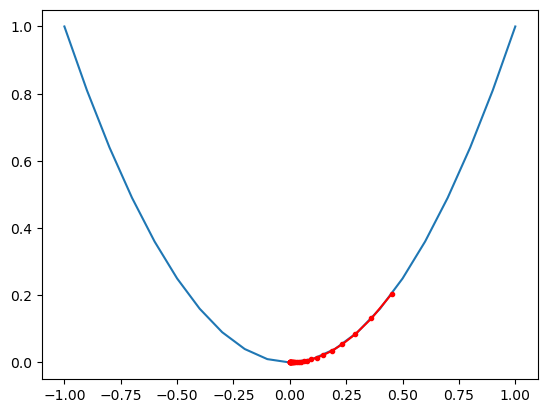

In [11]:
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
    # track all solutions
    solutions, scores = list(), list()
    # generate an initial point
    solution = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # run the gradient descent
    for i in range(n_iter):
        # calculate gradient
        gradient = derivative(solution)
        # take a step
        solution = solution - step_size * gradient
        # evaluate candidate point
        solution_eval = objective(solution)
        # store solution
        solutions.append(solution)
        scores.append(solution_eval)
        # report progress
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solutions, scores]

solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)

# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)

pyplot.plot(solutions, scores, '.-', color='red')

### Gradient descent variations

#### Data

In [12]:
# Creating a function f(X) with a slope of -5
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X

# Adding Gaussian noise to the function f(X) and saving it in Y
Y = func + 0.4 * torch.randn(X.size())

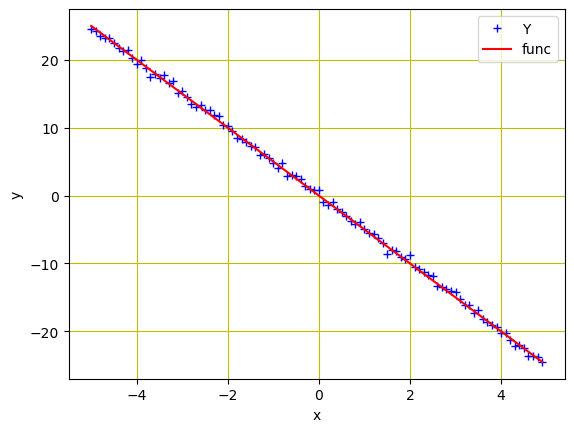

In [13]:
# Plot and visualizing the data points in blue
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

In [14]:
# defining the function for forward pass for prediction
def forward(x):
    return w * x + b

# evaluating data points with Mean Square Error (MSE)
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

#### Batch gradient descent

In [15]:
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

step_size = 0.1
loss_BGD = []
n_iter = 20

for i in range (n_iter):
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_BGD.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting the values for understanding
    print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))

0, 	601.0424194335938, 	-1.841888427734375, 	-16.043292999267578
1, 	346.1010437011719, 	-7.243781566619873, 	-12.796346664428711
2, 	204.3855438232422, 	-3.6082499027252197, 	-10.2528076171875
3, 	123.22808837890625, 	-6.00771427154541, 	-8.181621551513672
4, 	75.53062438964844, 	-4.38655948638916, 	-6.548666954040527
5, 	46.89118194580078, 	-5.451539993286133, 	-5.2260918617248535
6, 	29.400766372680664, 	-4.727972507476807, 	-4.178681373596191
7, 	18.57965660095215, 	-5.200118064880371, 	-3.333517551422119
8, 	11.819677352905273, 	-4.876745223999023, 	-2.6621079444885254
9, 	7.566741466522217, 	-5.085721015930176, 	-2.12174654006958
10, 	4.877407550811768, 	-4.940930366516113, 	-1.6915472745895386
11, 	3.1706314086914062, 	-5.033203601837158, 	-1.3459398746490479
12, 	2.0846431255340576, 	-4.968201160430908, 	-1.0703767538070679
13, 	1.3924016952514648, 	-5.00880241394043, 	-0.8492761850357056
14, 	0.9505854249000549, 	-4.979510307312012, 	-0.6728017330169678
15, 	0.6683511137962341

#### SGD

In [16]:
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X
Y = func + 0.4 * torch.randn(X.size())

# defining the function for forward pass for prediction
def forward(x):
    return w * x + b

# evaluating data points with Mean Square Error (MSE)
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

step_size = 0.1
loss_SGD = []
n_iter = 20

for i in range (n_iter):    
    # calculating true loss and storing it
    Y_pred = forward(X)
    # store the loss in the list
    loss_SGD.append(criterion(Y_pred, Y).tolist())

    for x, y in zip(X, Y):
        # making a pridiction in forward pass
        y_hat = forward(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updateing the parameters after each iteration
        w.data = w.data - step_size * w.grad.data
        b.data = b.data - step_size * b.grad.data
        # zeroing gradients after each iteration
        w.grad.data.zero_()
        b.grad.data.zero_()
        # priting the values for understanding
        print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))

0, 	26.692367553710938, 	-4.833534240722656, 	-21.033292770385742
0, 	477.87164306640625, 	-26.25660514831543, 	-16.661237716674805
0, 	7153.58447265625, 	54.939109802246094, 	-33.57701110839844
0, 	99528.5, 	-241.61337280273438, 	29.519268035888672
0, 	1250074.625, 	787.008544921875, 	-194.09420776367188
0, 	14120265.0, 	-2594.916015625, 	557.444580078125
0, 	142880016.0, 	7923.9384765625, 	-1833.2041015625
0, 	1290815232.0, 	-22974.0703125, 	5352.37939453125
0, 	10367834112.0, 	62556.8828125, 	-15012.134765625
0, 	73720922112.0, 	-160086.21875, 	39291.0625
0, 	461878329344.0, 	383606.78125, 	-96632.203125
0, 	2536749400064.0, 	-858713.0, 	221911.328125
0, 	12145235329024.0, 	1789888.0, 	-475089.0
0, 	50377240084480.0, 	-3462404.0, 	944449.5
0, 	179803588132864.0, 	6192138.0, 	-1737367.75
0, 	548021922168832.0, 	-10194769.0, 	2944605.75
0, 	1414271661506560.0, 	15377859.0, 	-4576755.0
0, 	3060712612036608.0, 	-21135788.0, 	6487987.0
0, 	5494143103008768.0, 	26302608.0, 	-8336511.0
0, 

11, 	64123652.0, 	35828.609375, 	34048.1796875
11, 	80367056.0, 	37083.67578125, 	32255.2265625
11, 	100043224.0, 	38283.93359375, 	30254.794921875
11, 	123447400.0, 	39395.00390625, 	28032.65625
11, 	150635952.0, 	40376.875, 	25577.98046875
11, 	181259552.0, 	41184.671875, 	22885.328125
11, 	214548848.0, 	41770.5703125, 	19955.830078125
11, 	248967200.0, 	42086.14453125, 	16800.091796875
11, 	282238368.0, 	42086.14453125, 	13440.1015625
11, 	311506368.0, 	41733.15234375, 	9910.193359375
11, 	333332896.0, 	41002.85546875, 	6258.7119140625
11, 	344518176.0, 	39889.18359375, 	2546.4716796875
11, 	342402656.0, 	38408.85546875, 	-1154.353271484375
11, 	325885152.0, 	36603.625, 	-4764.81103515625
11, 	295856320.0, 	34539.56640625, 	-8204.90625
11, 	255234416.0, 	32302.91796875, 	-11400.1181640625
11, 	208690336.0, 	29991.5390625, 	-14289.341796875
11, 	161482096.0, 	27704.177734375, 	-16830.853515625
11, 	118327376.0, 	25528.609375, 	-19006.421875
11, 	82458904.0, 	23530.857421875, 	-20822.

#### Compare

Let's visualize!

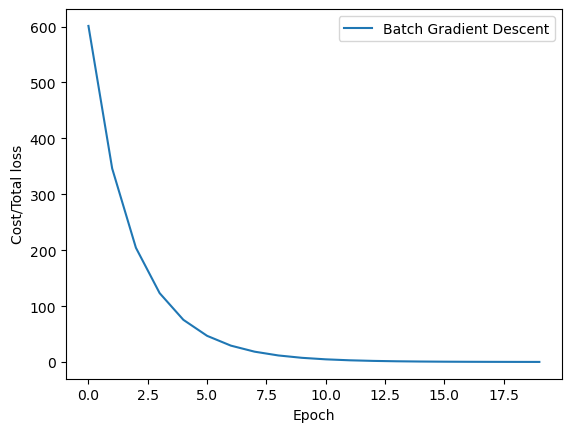

In [17]:
plt.plot(loss_BGD, label="Batch Gradient Descent")
plt.xlabel('Epoch')
plt.ylabel('Cost/Total loss')
plt.legend()
plt.show()

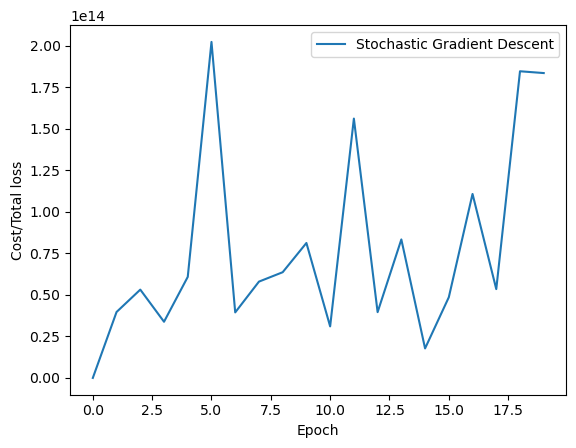

In [18]:
plt.plot(loss_SGD,label="Stochastic Gradient Descent")
plt.xlabel('Epoch')
plt.ylabel('Cost/Total loss')
plt.legend()
plt.show()

## GD in torch: mini-batch based algorithms

### SGD vs Adam

In [19]:
from torch.utils.data import Dataset, DataLoader

# Creating our dataset class
class Build_Data(Dataset):    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.func = -5 * self.x + 1
        self.y = self.func + 0.4 * torch.randn(self.x.size())
        self.len = self.x.shape[0]        
    # Getting the data
    def __getitem__(self, index):    
        return self.x[index], self.y[index]    
    # Getting length of the data
    def __len__(self):
        return self.len

# Create dataset object
data_set = Build_Data()

model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()

# Creating Dataloader object
trainloader = DataLoader(dataset = data_set, batch_size=1)

# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

loss_SGD = []
n_iter = 20

for i in range(n_iter):
    for x, y in trainloader:
        # making a pridiction in forward pass
        y_hat = model(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # store loss into list
        loss_SGD.append(loss.item())
        # zeroing gradients after each iteration
        optimizer.zero_grad()
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updateing the parameters after each iteration
        optimizer.step()

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

# Creating our dataset class
class Build_Data(Dataset):
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.func = -5 * self.x + 1
        self.y = self.func + 0.4 * torch.randn(self.x.size())
        self.len = self.x.shape[0]        
    # Getting the data
    def __getitem__(self, index):    
        return self.x[index], self.y[index]    
    # Getting length of the data
    def __len__(self):
        return self.len

# Create dataset object
data_set = Build_Data()

model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()

# Creating Dataloader object
trainloader = DataLoader(dataset = data_set, batch_size=1)

# define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

loss_Adam = []
n_iter = 20

for i in range(n_iter):
    for x, y in trainloader:
        # making a pridiction in forward pass
        y_hat = model(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # store loss into list
        loss_Adam.append(loss.item())
        # zeroing gradients after each iteration
        optimizer.zero_grad()
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updateing the parameters after each iteration
        optimizer.step()

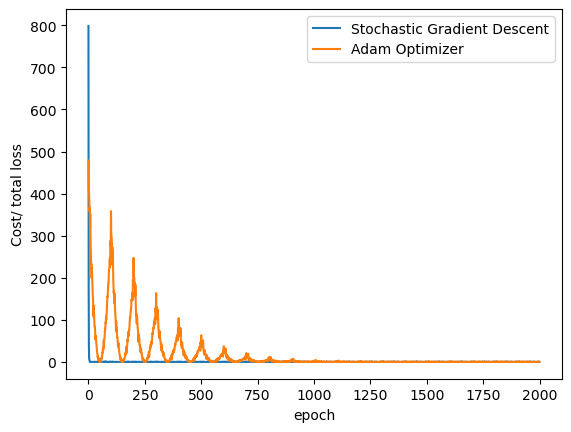

In [21]:

plt.plot(loss_SGD,label = "Stochastic Gradient Descent")
plt.plot(loss_Adam,label = "Adam Optimizer")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

SGD converges faster and Adam  oscilates being overkill for this task

## Regularizations 

### Dropout

In [35]:
# Read data
data = pd.read_csv("sonar.csv", header=None)
X = data.iloc[:, 0:60]
y = data.iloc[:, 60]

display(data.head())

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [36]:
# Label encode the target from string to integer
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

# Convert to 2D PyTorch tensors
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

#### Base model, no regulariations:

In [37]:
class BaseModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(60, 60)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(60, 30)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(30, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.sigmoid(self.output(x))
        return x

In [38]:
def model_train(model, X_train, y_train, X_val, y_val,
                n_epochs=300, batch_size=16):
    loss_fn = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.8)
    batch_start = torch.arange(0, len(X_train), batch_size)

    model.train()
    for epoch in range(n_epochs):
        for start in batch_start:
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # evaluation
    model.eval()
    y_pred = model(X_val)
    acc = (y_pred.round() == y_val).float().mean()
    acc = float(acc)
    return acc

In [39]:
# run 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = []
for train, test in kfold.split(X, y):
    # create model, train, and get accuracy
    model = BaseModel()
    acc = model_train(model, X[train], y[train], X[test], y[test])
    print("Accuracy: %.2f" % acc)
    accuracies.append(acc)

# evaluate the model
mean = np.mean(accuracies)
std = np.std(accuracies)
print("Overal for baseline model: %.2f%% (+/- %.2f%%)" % (mean*100, std*100))

Accuracy: 0.90
Accuracy: 0.71
Accuracy: 0.90
Accuracy: 0.81
Accuracy: 0.76
Accuracy: 0.95
Accuracy: 0.86
Accuracy: 0.67
Accuracy: 0.95
Accuracy: 0.70
Overal for baseline model: 82.21% (+/- 10.13%)


#### Dropout

In [40]:
class SonarModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.dropout = nn.Dropout(0.2) ## Adding a dropout layer
        self.layer1 = nn.Linear(60, 60)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(60, 30)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(30, 1)
        self.sigmoid = nn.Sigmoid()
 
    def forward(self, x):
        x = self.dropout(x)
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.sigmoid(self.output(x))
        return x

In [41]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = []
for train, test in kfold.split(X, y):
    # create model, train, and get accuracy
    model = SonarModel()
    acc = model_train(model, X[train], y[train], X[test], y[test])
    print("Accuracy: %.2f" % acc)
    accuracies.append(acc)
    
# evaluate the model
mean = np.mean(accuracies)
std = np.std(accuracies)
print("Overall for input-dropout: %.2f%% (+/- %.2f%%)" % (mean*100, std*100))

Accuracy: 0.76
Accuracy: 0.86
Accuracy: 0.62
Accuracy: 0.67
Accuracy: 0.67
Accuracy: 0.90
Accuracy: 0.76
Accuracy: 0.95
Accuracy: 0.95
Accuracy: 0.90
Overall for input-dropout: 80.40% (+/- 11.87%)


In [42]:
class SonarModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(60, 60)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.layer2 = nn.Linear(60, 30)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2)
        self.output = nn.Linear(30, 1)
        self.sigmoid = nn.Sigmoid()
 
    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.dropout1(x)
        x = self.act2(self.layer2(x))
        x = self.dropout2(x)
        x = self.sigmoid(self.output(x))
        return x

In [43]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = []
for train, test in kfold.split(X, y):
    # create model, train, and get accuracy
    model = SonarModel()
    acc = model_train(model, X[train], y[train], X[test], y[test])
    print("Accuracy: %.2f" % acc)
    accuracies.append(acc)

# evaluate the model
mean = np.mean(accuracies)
std = np.std(accuracies)
print("OVeral for hidden-dropout: %.2f%% (+/- %.2f%%)" % (mean*100, std*100))

Accuracy: 0.86
Accuracy: 0.81
Accuracy: 1.00
Accuracy: 0.86
Accuracy: 0.86
Accuracy: 0.76
Accuracy: 0.86
Accuracy: 0.71
Accuracy: 0.75
Accuracy: 0.90
OVeral for hidden-dropout: 83.64% (+/- 7.82%)


### Bonus: Elastic Net

$$\lambda_{L1} \times \sum_f{ _{i=1}^{n}} | w_i | + \lambda_{L2} \times \sum_f{ _{i=1}^{n}} w_i^2$$

$$ full\_loss = original\_loss  + \lambda_{L1} \times \sum_f{ _{i=1}^{n}} | w_i | + \lambda_{L2} \times \sum_f{ _{i=1}^{n}} w_i^2 $$

In [45]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
          nn.Flatten(),
          nn.Linear(28 * 28 * 1, 64),
          nn.ReLU(),
          nn.Linear(64, 32),
          nn.ReLU(),
          nn.Linear(32, 10)
        )


    def forward(self, x):
        return self.layers(x)

    def compute_l1_loss(self, w):
        return torch.abs(w).sum()

    def compute_l2_loss(self, w):
        return torch.square(w).sum()

In [46]:
torch.manual_seed(42)
  
# Prepare CIFAR-10 dataset
dataset = MNIST(os.getcwd(), download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)

# Initialize the MLP
mlp = MLP()

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)
losses_elastic = []

In [47]:
for epoch in range(0, 5): # 5 epochs at maximum
    train_loss = 0.00
# Print epoch
    print(f'Starting epoch {epoch+1}')

# Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):

        # Get inputs
        inputs, targets = data

        # Zero the gradients
        optimizer.zero_grad()

        # Perform forward pass
        outputs = mlp(inputs)

        # Compute loss
        loss = loss_function(outputs, targets)

        # Specify L1 and L2 weights
        l1_weight = 0.3
        l2_weight = 0.7

        # Compute L1 and L2 loss component
        parameters = []
        for parameter in mlp.parameters():
            parameters.append(parameter.view(-1))
        l1 = l1_weight * mlp.compute_l1_loss(torch.cat(parameters))
        l2 = l2_weight * mlp.compute_l2_loss(torch.cat(parameters))

        # Add L1 and L2 loss components
        loss += l1
        loss += l2

        # Perform backward pass
        loss.backward()

        # Perform optimization
        optimizer.step()

        # Print statistics
        minibatch_loss = loss.item()
        train_loss += minibatch_loss
        losses_elastic.append(train_loss/(i+1))
        if i % 500 == 499:
            print('Loss after mini-batch %5d: %.5f (of which %.5f L1 loss; %0.5f L2 loss)' %
                (i + 1, minibatch_loss, l1, l2))
            current_loss = 0.0

# Process is complete.
print('Training process has finished.')

Starting epoch 1
Loss after mini-batch   500: 24.79362 (of which 19.77028 L1 loss; 2.74106 L2 loss)
Loss after mini-batch  1000: 7.52453 (of which 4.81060 L1 loss; 0.39591 L2 loss)
Loss after mini-batch  1500: 3.03675 (of which 0.69903 L1 loss; 0.03131 L2 loss)
Loss after mini-batch  2000: 2.48315 (of which 0.18056 L1 loss; 0.00001 L2 loss)
Loss after mini-batch  2500: 2.48123 (of which 0.17864 L1 loss; 0.00001 L2 loss)
Loss after mini-batch  3000: 2.48011 (of which 0.17751 L1 loss; 0.00001 L2 loss)
Loss after mini-batch  3500: 2.48004 (of which 0.17745 L1 loss; 0.00001 L2 loss)
Loss after mini-batch  4000: 2.47988 (of which 0.17730 L1 loss; 0.00001 L2 loss)
Loss after mini-batch  4500: 2.47929 (of which 0.17670 L1 loss; 0.00001 L2 loss)
Loss after mini-batch  5000: 2.47955 (of which 0.17696 L1 loss; 0.00001 L2 loss)
Loss after mini-batch  5500: 2.48013 (of which 0.17754 L1 loss; 0.00001 L2 loss)
Loss after mini-batch  6000: 2.48089 (of which 0.17830 L1 loss; 0.00001 L2 loss)
Starting 

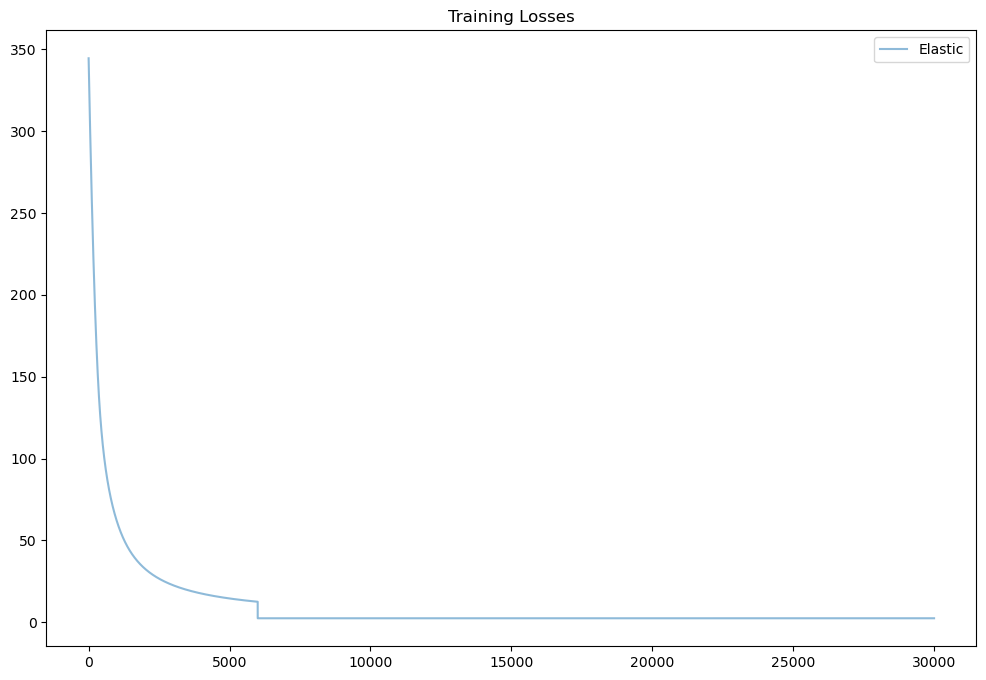

In [52]:
fig, ax = plt.subplots(figsize=(12,8))
#losses_batchnorm = np.array(losses_batchnorm)
# #losses_no_norm = np.array(losses_no_norm)
# plt.plot(losses_l1, label='L1', alpha=0.5)
# plt.plot(losses_l2, label='L2', alpha=0.5)
plt.plot(losses_elastic, label='Elastic', alpha=0.5)
plt.title("Training Losses")
plt.legend()

### Batch Norm

In [53]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 64

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# get the training and test datasets
train_data = MNIST(root='data', train=True,
                            download=True, transform=transform)

test_data = MNIST(root='data', train=False,
                           download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers)

In [54]:
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self, use_batch_norm, input_size=784, hidden_dim=256, output_size=10):
        """
        Creates a PyTorch net using the given parameters.
        
        :param use_batch_norm: bool
            Pass True to create a network that uses batch normalization; False otherwise
            Note: this network will not use batch normalization on layers that do not have an
            activation function.
        """
        super(NeuralNet, self).__init__() # init super
        
        # Default layer sizes
        self.input_size = input_size # (28*28 images)
        self.hidden_dim = hidden_dim
        self.output_size = output_size # (number of classes)
        # Keep track of whether or not this network uses batch normalization.
        self.use_batch_norm = use_batch_norm
        
        # define hidden linear layers, with optional batch norm on their outputs
        # layers with batch_norm applied have no bias term
        if use_batch_norm:
            self.fc1 = nn.Linear(input_size, hidden_dim*2, bias=False)
            self.batch_norm1 = nn.BatchNorm1d(hidden_dim*2)
        else:
            self.fc1 = nn.Linear(input_size, hidden_dim*2)
            
        # define *second* hidden linear layers, with optional batch norm on their outputs
        if use_batch_norm:
            self.fc2 = nn.Linear(hidden_dim*2, hidden_dim, bias=False)
            self.batch_norm2 = nn.BatchNorm1d(hidden_dim)
        else:
            self.fc2 = nn.Linear(hidden_dim*2, hidden_dim)
        
        # third and final, fully-connected layer
        self.fc3 = nn.Linear(hidden_dim, output_size)
        
        
    def forward(self, x):
        # flatten image
        x = x.view(-1, 28*28)
        # all hidden layers + optional batch norm + relu activation
        x = self.fc1(x)
        if self.use_batch_norm:
            x = self.batch_norm1(x)
        x = F.relu(x)
        # second layer
        x = self.fc2(x)
        if self.use_batch_norm:
            x = self.batch_norm2(x)
        x = F.relu(x)
        # third layer, no batch norm or activation
        x = self.fc3(x)
        return x


In [55]:
net_batchnorm = NeuralNet(use_batch_norm=True)
net_no_norm = NeuralNet(use_batch_norm=False)

print(net_batchnorm)
print()
print(net_no_norm)

NeuralNet(
  (fc1): Linear(in_features=784, out_features=512, bias=False)
  (batch_norm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=False)
  (batch_norm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

NeuralNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [56]:
def train(model, n_epochs=10):
    # number of epochs to train the model
    n_epochs = n_epochs
    # track losses
    losses = []
        
    # optimization strategy 
    # specify loss function (categorical cross-entropy)
    criterion = nn.CrossEntropyLoss()

    # specify optimizer (stochastic gradient descent) and learning rate = 0.01
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    # set the model to training mode
    model.train()
    
    for epoch in range(1, n_epochs+1):
        # monitor training loss
        train_loss = 0.0

        ###################
        # train the model #
        ###################
        batch_count = 0
        for batch_idx, (data, target) in enumerate(train_loader):
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update average training loss
            train_loss += loss.item() # add up avg batch loss
            batch_count +=1                

        # print training statistics 
        losses.append(train_loss/batch_count)
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch, 
            train_loss/batch_count))
    
    # return all recorded batch losses
    return losses      

In [57]:
losses_batchnorm = train(net_batchnorm)

Epoch: 1 	Training Loss: 0.391168
Epoch: 2 	Training Loss: 0.165785
Epoch: 3 	Training Loss: 0.115549
Epoch: 4 	Training Loss: 0.086180
Epoch: 5 	Training Loss: 0.066142
Epoch: 6 	Training Loss: 0.051552
Epoch: 7 	Training Loss: 0.040513
Epoch: 8 	Training Loss: 0.032000
Epoch: 9 	Training Loss: 0.025399
Epoch: 10 	Training Loss: 0.020293


In [58]:
losses_no_norm = train(net_no_norm)

Epoch: 1 	Training Loss: 1.627025
Epoch: 2 	Training Loss: 0.526522
Epoch: 3 	Training Loss: 0.387258
Epoch: 4 	Training Loss: 0.338334
Epoch: 5 	Training Loss: 0.308756
Epoch: 6 	Training Loss: 0.286501
Epoch: 7 	Training Loss: 0.267729
Epoch: 8 	Training Loss: 0.250841
Epoch: 9 	Training Loss: 0.235325
Epoch: 10 	Training Loss: 0.221022


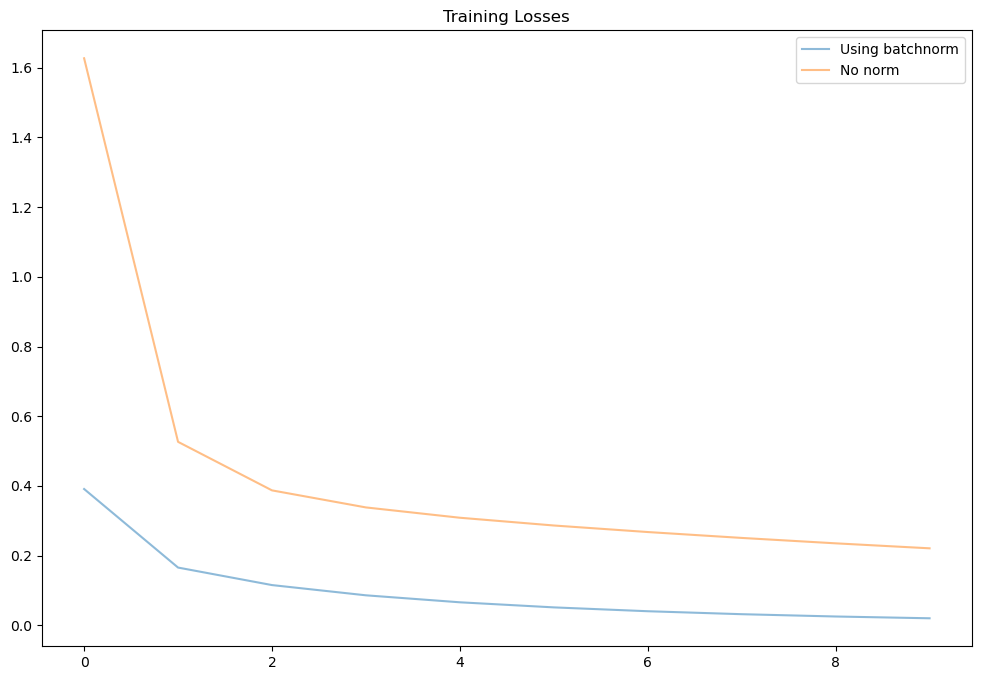

In [59]:
# compare
fig, ax = plt.subplots(figsize=(12,8))
#losses_batchnorm = np.array(losses_batchnorm)
#losses_no_norm = np.array(losses_no_norm)
plt.plot(losses_batchnorm, label='Using batchnorm', alpha=0.5)
plt.plot(losses_no_norm, label='No norm', alpha=0.5)
plt.title("Training Losses")
plt.legend()

In [60]:
def test(model, train):
    # initialize vars to monitor test loss and accuracy
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    test_loss = 0.0

    # set model to train or evaluation mode
    # just to see the difference in behavior
    if(train==True):
        model.train()
    if(train==False):
        model.eval()
    
    # loss criterion
    criterion = nn.CrossEntropyLoss()
    
    for batch_idx, (data, target) in enumerate(test_loader):
        batch_size = data.size(0)
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss += loss.item()*batch_size
        # convert output probabilities to predicted class
        _, pred = torch.max(output, 1)
        # compare predictions to true label
        correct = np.squeeze(pred.eq(target.data.view_as(pred)))
        # calculate test accuracy for each object class
        for i in range(batch_size):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    print('Test Loss: {:.6f}\n'.format(test_loss/len(test_loader.dataset)))

    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

In [61]:
test(net_batchnorm, train=True)

Test Loss: 0.083724

Test Accuracy of     0: 98% (968/980)
Test Accuracy of     1: 99% (1125/1135)
Test Accuracy of     2: 96% (1000/1032)
Test Accuracy of     3: 97% (982/1010)
Test Accuracy of     4: 97% (957/982)
Test Accuracy of     5: 97% (871/892)
Test Accuracy of     6: 97% (934/958)
Test Accuracy of     7: 97% (1000/1028)
Test Accuracy of     8: 97% (948/974)
Test Accuracy of     9: 96% (972/1009)

Test Accuracy (Overall): 97% (9757/10000)


In [62]:
test(net_batchnorm, train=False)

Test Loss: 0.072316

Test Accuracy of     0: 98% (970/980)
Test Accuracy of     1: 98% (1123/1135)
Test Accuracy of     2: 97% (1006/1032)
Test Accuracy of     3: 97% (989/1010)
Test Accuracy of     4: 97% (954/982)
Test Accuracy of     5: 98% (876/892)
Test Accuracy of     6: 97% (937/958)
Test Accuracy of     7: 96% (993/1028)
Test Accuracy of     8: 96% (939/974)
Test Accuracy of     9: 97% (986/1009)

Test Accuracy (Overall): 97% (9773/10000)


In [63]:
test(net_no_norm, train=False)

Test Loss: 0.212562

Test Accuracy of     0: 98% (965/980)
Test Accuracy of     1: 98% (1114/1135)
Test Accuracy of     2: 90% (937/1032)
Test Accuracy of     3: 93% (942/1010)
Test Accuracy of     4: 93% (916/982)
Test Accuracy of     5: 91% (816/892)
Test Accuracy of     6: 95% (911/958)
Test Accuracy of     7: 92% (955/1028)
Test Accuracy of     8: 90% (885/974)
Test Accuracy of     9: 93% (941/1009)

Test Accuracy (Overall): 93% (9382/10000)
